## Bayesian Analysis of 2020 Bundesliga Results

In [1]:
library("rstan")
library("parallel")
library("bayesplot")

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.21.5, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)

This is bayesplot version 1.9.0

- Online documentation and vignettes at mc-stan.org/bayesplot

- bayesplot theme set to bayesplot::theme_default()

   * Does _not_ affect other ggplot2 plots

   * See ?bayesplot_theme_set for details on theme setting



In [2]:
# example(stan_model, package = "rstan", run.dontrun = TRUE)

In [3]:
options(mc.cores = parallel::detectCores())
rstan_options(auto_write = TRUE)
Sys.setenv(LOCAL_CPPFLAGS = '-march=native')

In [4]:
getwd()

[1] "/mnt/d/Github/Stan/Stan/Jupyter"

In [9]:
setwd("/mnt/d/Github/Stan/Stan")
remove(list = ls()) # clear the current work space

In [10]:
HFA <- readRDS(file = paste(getwd(),
    "/Data/Sorted_Bundesliga_2019_20.rds", sep = ""))

In [11]:
ngames <- nrow(HFA)
ngames

nteams <- length(unique(HFA$host))
nteams

HFA$COVID + 1

dl <- list(
  G = ngames,
  yh = HFA$HG,
  yv = HFA$VG,
  COV = HFA$COVID + 1,
  xh = HFA$host,
  xv = HFA$visitor,
  T = nteams
)

[1] 306

[1] 18

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[223] 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[260] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[297] 2 2 2 2 2 2 2 2 2 2

In [13]:
remove(sm)
sm <- stan_model(paste(getwd(), "/Models/Bundesliga2020.stan", sep = ""))

Warning message in remove(sm):
“object 'sm' not found”
hash mismatch so recompiling; make sure Stan code ends with a blank line



In [ ]:
# fit <- stan(
#   file = paste(getwd(), "/Models/Bundesliga2020.stan", sep = ""),  # Stan program
#   data = dl,    # named list of data
#   chains = 4,             # number of Markov chains
#   warmup = 1000,          # number of warmup iterations per chain
#   iter = 2000,            # total number of iterations per chain
#   cores = 2,              # number of cores (could use one per chain)
#   refresh = 1             # no progress shown
#   )

In [14]:
remove(fit)
fit <- sampling(object = sm,
                data = dl,
                init = "random",
                control = list(adapt_delta = 0.95),
                chains = 4,
                iter = 2000,
                warmup = 1500,
                thin = 1,
                verbose = TRUE)

Warning message in remove(fit):
“object 'fit' not found”



CHECKING DATA AND PREPROCESSING FOR MODEL 'Bundesliga2020' NOW.

COMPILING MODEL 'Bundesliga2020' NOW.

STARTING SAMPLER FOR MODEL 'Bundesliga2020' NOW.


Warning message:
“There were 1 divergent transitions after warmup. See
https://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”
Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#bulk-ess”


In [15]:
s <- summary(fit, pars = c("lambda_O_t"), prob=c(0.05, 0.5, 0.95))

In [16]:
round(s$summary, 2)

,mean,se_mean,sd,5%,50%,95%,n_eff,Rhat
lambda_O_t[1],0.07,0.01,0.16,-0.20,0.07,0.32,435.73,1.01
lambda_O_t[2],0.02,0.01,0.15,-0.22,0.02,0.26,563.27,1.01
lambda_O_t[3],0.12,0.01,0.15,-0.12,0.11,0.36,457.58,1.01
lambda_O_t[4],0.59,0.01,0.14,0.36,0.58,0.82,330.94,1.01
lambda_O_t[5],-0.09,0.01,0.16,-0.36,-0.08,0.16,675.77,1.01
lambda_O_t[6],0.29,0.01,0.14,0.06,0.29,0.52,364.28,1.01
lambda_O_t[7],0.11,0.01,0.15,-0.14,0.11,0.37,415.81,1.01
lambda_O_t[8],0.20,0.01,0.15,-0.05,0.20,0.43,443.27,1.01
lambda_O_t[9],0.17,0.01,0.15,-0.08,0.17,0.41,420.07,1.01
lambda_O_t[10],0.55,0.01,0.14,0.33,0.55,0.79,328.85,1.01


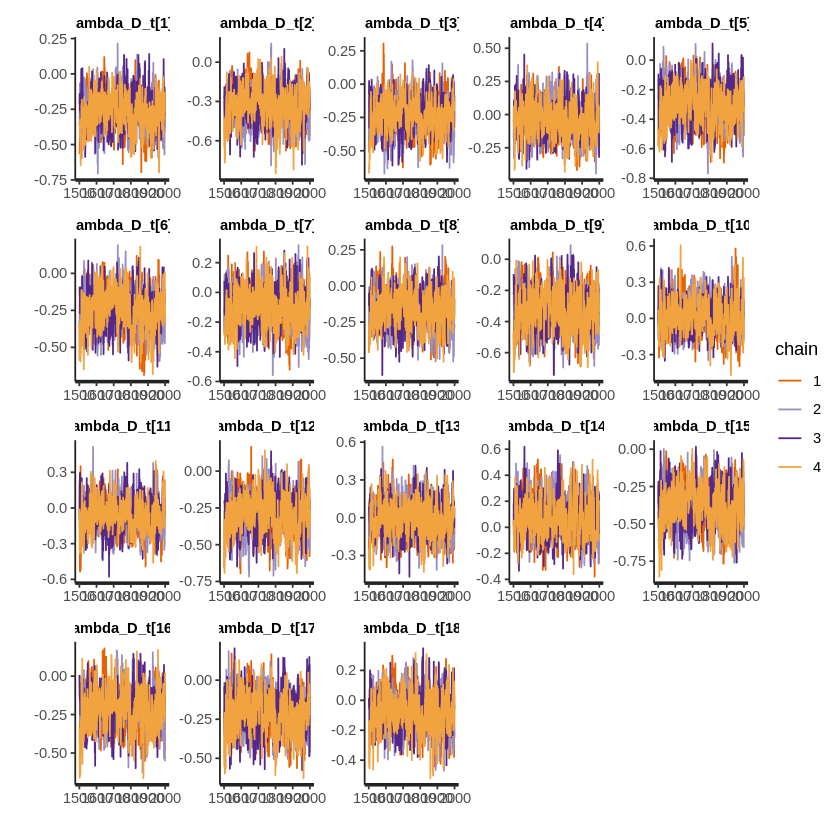

In [17]:
traceplot(fit, pars=c("lambda_D_t"))

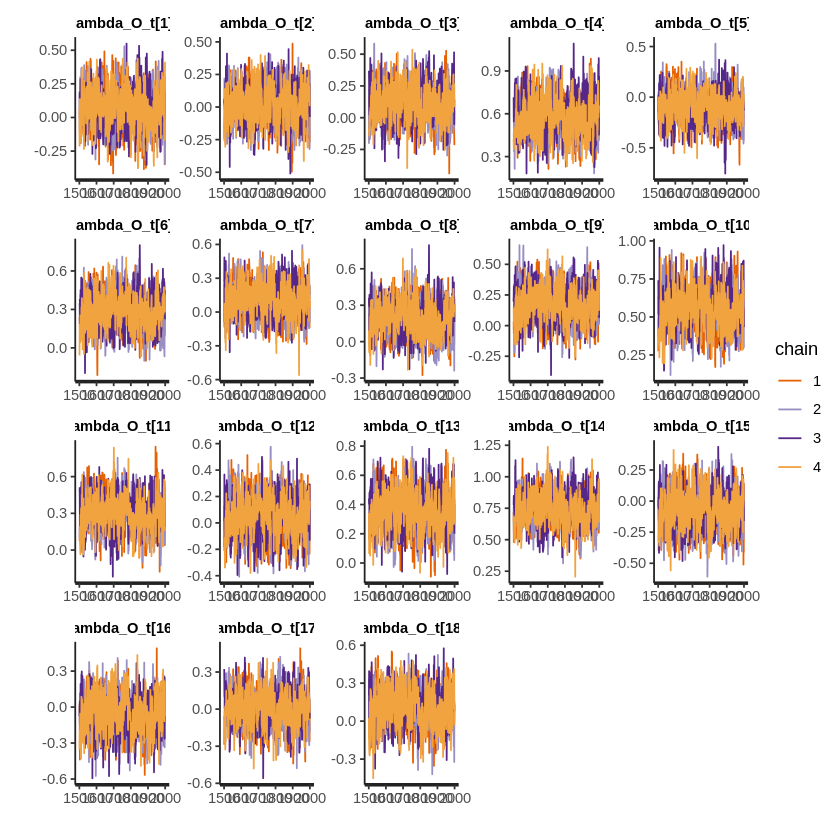

In [18]:
traceplot(fit, pars=c("lambda_O_t"))

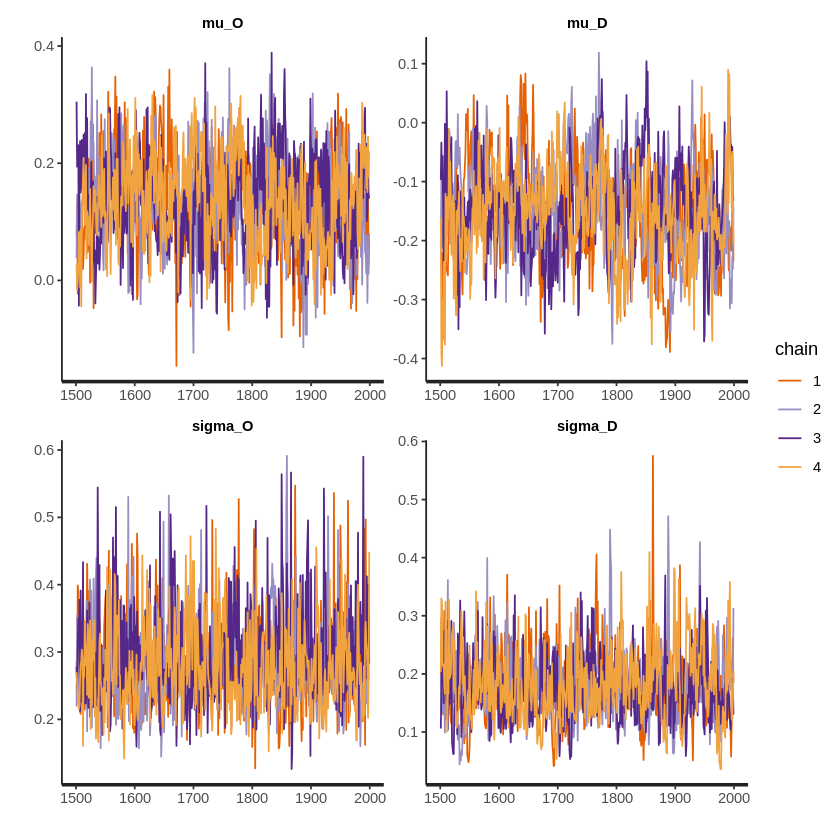

In [19]:
traceplot(fit, pars=c("mu_O", "mu_D", "sigma_O", "sigma_D"))

In [20]:
theme_posterior <- theme(
    axis.line.x = element_line(arrow=arrow(length=unit(0.05, "cm")),
     lineend = "butt"),
    panel.background = element_rect(fill="transparent"),
    panel.border = element_rect(fill="transparent"),
    plot.background = element_rect(fill = "transparent"),
  #panel.spacing.y = unit(1,"lines"),
    plot.margin = unit(c(1,1,1,1), "cm"),
  #
    axis.title.y = element_blank(), 
    axis.text.y = element_text(color = "grey20",
      size = 8, angle = 0, hjust = 1, vjust = 0, face = "plain"),
    xis.text.x = element_text(color="grey20",
      hjust = 1, vjust=1, size=8, angle = 50, face = "plain"),
    axis.ticks.y = element_blank()
)

ci_level: 0.9 (90% intervals)

outer_level: 0.95 (95% intervals)



ERROR: Error in eval(expr, envir, enclos): object 'theme_Posterior' not found


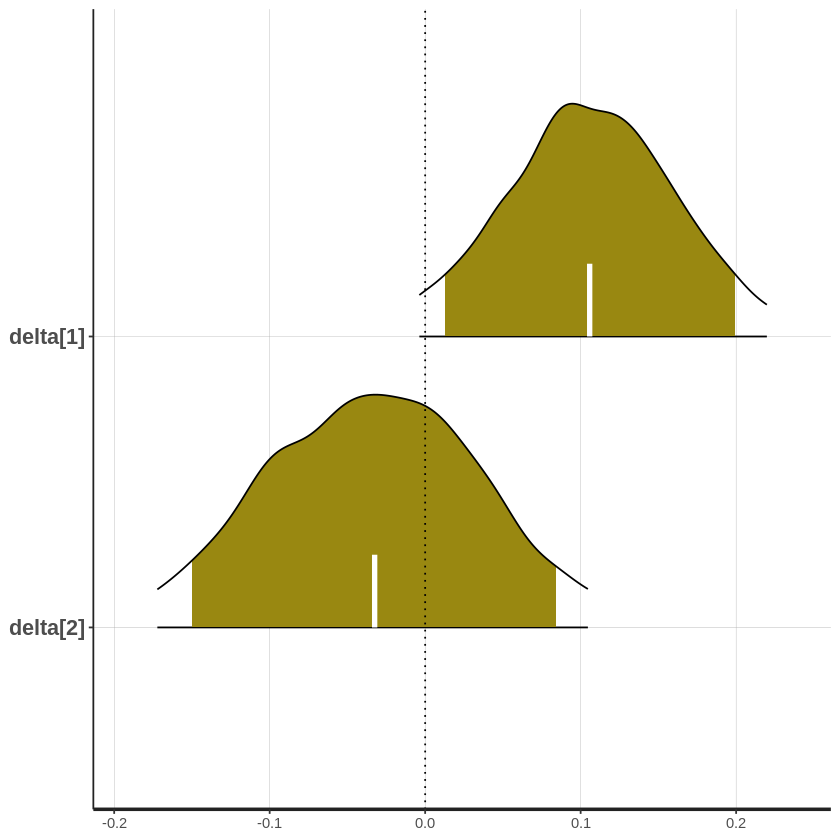

In [21]:
plot(fit,
     pars = names(fit)[c(5, 6)],
     show_density = TRUE,
     fill_color = "#998811",
     est_color = "#ffffff",
     ci_level = 0.9, outer_level=0.95) +
     geom_vline(xintercept = 0, linetype = 3, size = 0.5)
     + theme_Posterior

In [22]:
names(fit)

[1] "mu_O"           "mu_D"           "sigma_O"        "sigma_D"       
   [5] "delta[1]"       "delta[2]"       "lambda_O_t[1]"  "lambda_O_t[2]" 
   [9] "lambda_O_t[3]"  "lambda_O_t[4]"  "lambda_O_t[5]"  "lambda_O_t[6]" 
  [13] "lambda_O_t[7]"  "lambda_O_t[8]"  "lambda_O_t[9]"  "lambda_O_t[10]"
  [17] "lambda_O_t[11]" "lambda_O_t[12]" "lambda_O_t[13]" "lambda_O_t[14]"
  [21] "lambda_O_t[15]" "lambda_O_t[16]" "lambda_O_t[17]" "lambda_O_t[18]"
  [25] "lambda_D_t[1]"  "lambda_D_t[2]"  "lambda_D_t[3]"  "lambda_D_t[4]" 
  [29] "lambda_D_t[5]"  "lambda_D_t[6]"  "lambda_D_t[7]"  "lambda_D_t[8]" 
  [33] "lambda_D_t[9]"  "lambda_D_t[10]" "lambda_D_t[11]" "lambda_D_t[12]"
  [37] "lambda_D_t[13]" "lambda_D_t[14]" "lambda_D_t[15]" "lambda_D_t[16]"
  [41] "lambda_D_t[17]" "lambda_D_t[18]" "theta_V[1]"     "theta_V[2]"    
  [45] "theta_V[3]"     "theta_V[4]"     "theta_V[5]"     "theta_V[6]"    
  [49] "theta_V[7]"     "theta_V[8]"     "theta_V[9]"     "theta_V[10]"   
  [53] "theta_V[11]"    "theta_V[12]"    "theta_V[13]"    "theta_V[14]"   
  [57] "theta_V[15]"    "theta_V[16]"    "theta_V[17]"    "theta_V[18]"   
  [61] "theta_V[19]"    "theta_V[20]"    "theta_V[21]"    "theta_V[22]"   
  [65] "theta_V[23]"    "theta_V[24]"    "theta_V[25]"    "theta_V[26]"   
  [69] "theta_V[27]"    "theta_V[28]"    "theta_V[29]"    "theta_V[30]"   
  [73] "theta_V[31]"    "theta_V[32]"    "theta_V[33]"    "theta_V[34]"   
  [77] "theta_V[35]"    "theta_V[36]"    "theta_V[37]"    "theta_V[38]"   
  [81] "theta_V[39]"    "theta_V[40]"    "theta_V[41]"    "theta_V[42]"   
  [85] "theta_V[43]"    "theta_V[44]"    "theta_V[45]"    "theta_V[46]"   
  [89] "theta_V[47]"    "theta_V[48]"    "theta_V[49]"    "theta_V[50]"   
  [93] "theta_V[51]"    "theta_V[52]"    "theta_V[53]"    "theta_V[54]"   
  [97] "theta_V[55]"    "theta_V[56]"    "theta_V[57]"    "theta_V[58]"   
 [101] "theta_V[59]"    "theta_V[60]"    "theta_V[61]"    "theta_V[62]"   
 [105] "theta_V[63]"    "theta_V[64]"    "theta_V[65]"    "theta_V[66]"   
 [109] "theta_V[67]"    "theta_V[68]"    "theta_V[69]"    "theta_V[70]"   
 [113] "theta_V[71]"    "theta_V[72]"    "theta_V[73]"    "theta_V[74]"   
 [117] "theta_V[75]"    "theta_V[76]"    "theta_V[77]"    "theta_V[78]"   
 [121] "theta_V[79]"    "theta_V[80]"    "theta_V[81]"    "theta_V[82]"   
 [125] "theta_V[83]"    "theta_V[84]"    "theta_V[85]"    "theta_V[86]"   
 [129] "theta_V[87]"    "theta_V[88]"    "theta_V[89]"    "theta_V[90]"   
 [133] "theta_V[91]"    "theta_V[92]"    "theta_V[93]"    "theta_V[94]"   
 [137] "theta_V[95]"    "theta_V[96]"    "theta_V[97]"    "theta_V[98]"   
 [141] "theta_V[99]"    "theta_V[100]"   "theta_V[101]"   "theta_V[102]"  
 [145] "theta_V[103]"   "theta_V[104]"   "theta_V[105]"   "theta_V[106]"  
 [149] "theta_V[107]"   "theta_V[108]"   "theta_V[109]"   "theta_V[110]"  
 [153] "theta_V[111]"   "theta_V[112]"   "theta_V[113]"   "theta_V[114]"  
 [157] "theta_V[115]"   "theta_V[116]"   "theta_V[117]"   "theta_V[118]"  
 [161] "theta_V[119]"   "theta_V[120]"   "theta_V[121]"   "theta_V[122]"  
 [165] "theta_V[123]"   "theta_V[124]"   "theta_V[125]"   "theta_V[126]"  
 [169] "theta_V[127]"   "theta_V[128]"   "theta_V[129]"   "theta_V[130]"  
 [173] "theta_V[131]"   "theta_V[132]"   "theta_V[133]"   "theta_V[134]"  
 [177] "theta_V[135]"   "theta_V[136]"   "theta_V[137]"   "theta_V[138]"  
 [181] "theta_V[139]"   "theta_V[140]"   "theta_V[141]"   "theta_V[142]"  
 [185] "theta_V[143]"   "theta_V[144]"   "theta_V[145]"   "theta_V[146]"  
 [189] "theta_V[147]"   "theta_V[148]"   "theta_V[149]"   "theta_V[150]"  
 [193] "theta_V[151]"   "theta_V[152]"   "theta_V[153]"   "theta_V[154]"  
 [197] "theta_V[155]"   "theta_V[156]"   "theta_V[157]"   "theta_V[158]"  
 [201] "theta_V[159]"   "theta_V[160]"   "theta_V[161]"   "theta_V[162]"  
 [205] "theta_V[163]"   "theta_V[164]"   "theta_V[165]"   "theta_V[166]"  
 [209] "theta_V[167]"   "theta_V[168]"   "theta_V[169]"   "theta_V[170]"  
 [213] "theta_V[171]"   "the

---

In [50]:
color_scheme_set("green")

In [51]:
mcmc = extract(fit)

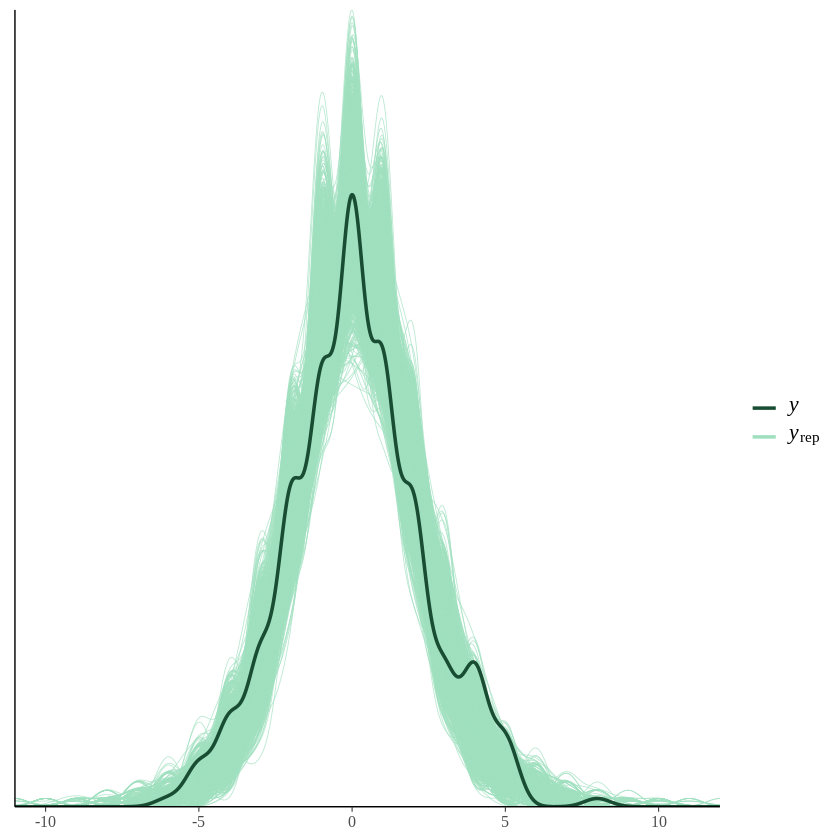

In [56]:
ppc_dens_overlay(y=as.numeric(HFA$HG - HFA$VG), yrep = mcmc$yp_H - mcmc$yp_V)

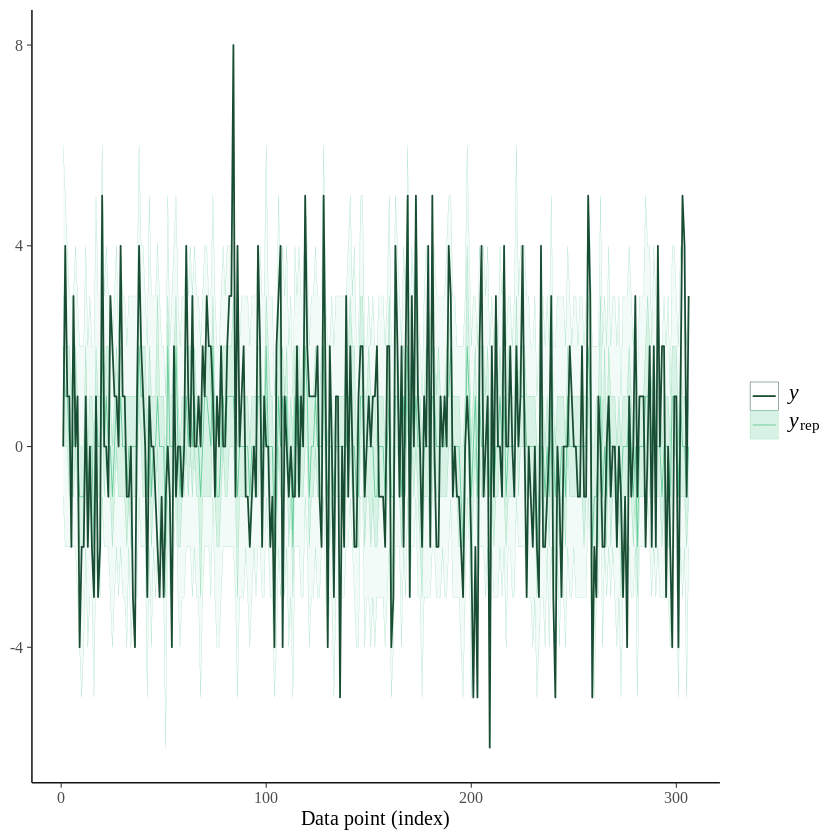

In [53]:
ppc_ribbon(y=as.numeric(HFA$HG - HFA$VG), yrep = mcmc$yp_H - mcmc$yp_V)

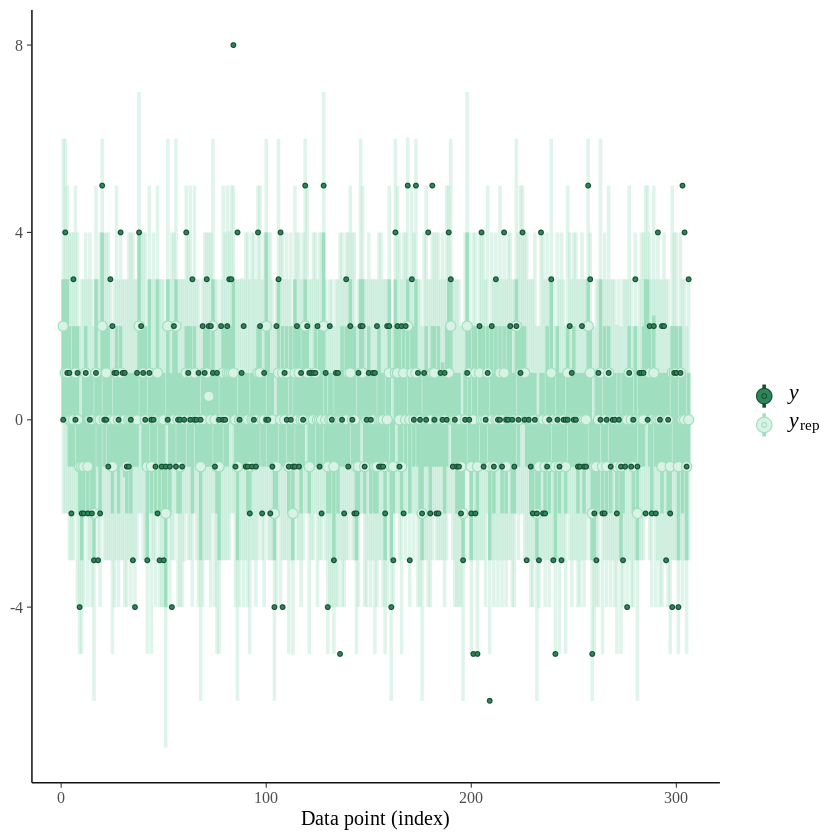

In [55]:
ppc_intervals(y=as.numeric(HFA$HG - HFA$VG), yrep = mcmc$yp_H - mcmc$yp_V, prob = 0.55, prob_outer = 0.95)